#  SyriaTel Customer Churn
### Author: George Opondi
---

## Overview
The objective of this project is to develop a robust classifier capable of predicting customer churn for SyriaTel, a telecommunications company. Customer churn prediction entails identifying customers who are likely to discontinue their services with the company in the near future. The task is framed as a binary classification problem, where the classifier will categorize customers into two groups: those expected to churn and those likely to remain.

---


## Business problem
The primary business challenge facing SyriaTel, a telecommunications company, is the need to minimize customer churn to maintain sustainable growth and profitability. High rates of customer churn can adversely affect revenue streams and erode market competitiveness. To address this challenge, SyriaTel must implement proactive strategies to identify customers at risk of discontinuing their services and effectively engage them with targeted retention initiatives. By leveraging advanced analytics and predictive modeling techniques, the company can develop a comprehensive understanding of customer behavior patterns and preferences, enabling them to tailor retention efforts and maximize customer satisfaction. 

Therefore, the goal of the project is to develop and deploy a robust classifier capable of accurately predicting customer churn for SyriaTel, enabling the company to proactively identify customers at risk of discontinuing their services. This classifier will assist SyriaTel in implementing targeted retention strategies to minimize churn, thereby maximizing customer retention, optimizing revenue streams, and ensuring sustainable business growth. Through a strategic focus on customer retention, SyriaTel can foster long-term relationships with its clientele, enhance brand loyalty, and ultimately drive business success in a competitive marketplace.

---



## Data Understanding

### Details on the data set

### Title: SyriaTel Customer Churn
Relevant information: This data set is used to predict customer churn based on the variables/columns available. The churn column is therefore the target variable.

In this dataset, there are 3333 unique rows and  21 independent predictive variables or column attributes.

### Sources:
 a) This data set is obtained from Kaggle
 
 b) (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

### Description of columns
- _state_ : The state of the customer.
- _account length_ : The length of the account in days or months.
- _area code_ : The area code of the customer's phone number.
- _phone number_ : The phone number of the customer.
- _international plan_ : Whether the customer has an international plan or not
- _voice mail plan_ : Whether the customer has a voicemail plan or not
- _number vmail messages_ : The number of voicemail messages the customer has.
- _total day minutes_ : Total minutes of day calls.
- _total day calls_ : Total number of day calls.
- _total day charge_ : Total charge for the day calls.
- _total eve minutes_ : Total minutes of evening calls.
- _total eve calls_ : Total number of evening calls.
- _total eve charge_ : Total charge for the evening calls.
- _total night minutes_ : Total minutes of night calls.
- _total night calls_ : Total number of night calls.
- _total night charge_ :  Total charge for the night calls.
- _total intl minutes_ : Total minutes of international calls.
- _total intl calls_ : Total number of international calls.
- _total intl charge_ : Total charge for the international calls.
- _customer service calls_ : Total charge for the international calls.
- _churn_ : Whether the customer churned or not (True/False).



## Importing necessary libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

## Exploratory Data Analysis and data preprocessing

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# Checking for null values in the dataset
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
df.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

The data set does not have any null values. The next step therefore is to preprocess the data

## Data preprocessing

Encoding the Categorical columns in the data set

In [11]:
# Perform label encoding on the categorical columns
df['churn_encoded'] = df['churn'].astype('category').cat.codes
df['voice_mail_plan_encoded'] = df['voice mail plan'].astype('category').cat.codes
df['international_plan_encoded'] = df['international plan'].astype('category').cat.codes

In [12]:
# Replacing the original  columns with the encoded  columns
df.drop(['churn', 'voice mail plan', 'international plan'], axis=1, inplace=True)
df.rename(columns={'churn_encoded': 'churn', 'voice_mail_plan_encoded': 'voice mail plan', 'international_plan_encoded': 'international plan'}, inplace=True)


In [13]:
df.head()

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,voice mail plan,international plan
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,1
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,0,1


### Univariate analysis
Visualizing the distribution of numeric features in the dataset

c:\Users\Admin\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


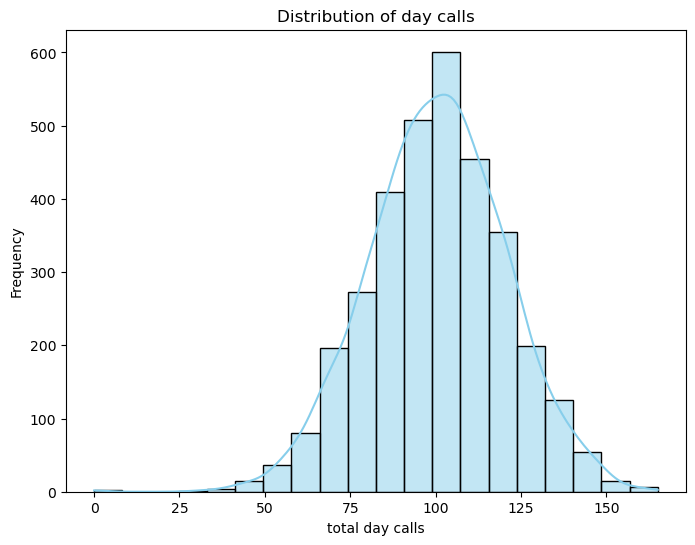

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total day calls'], bins=20, kde=True, color= 'skyblue')
plt.title('Distribution of day calls')
plt.xlabel('total day calls')
plt.ylabel('Frequency')
plt.show()

c:\Users\Admin\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


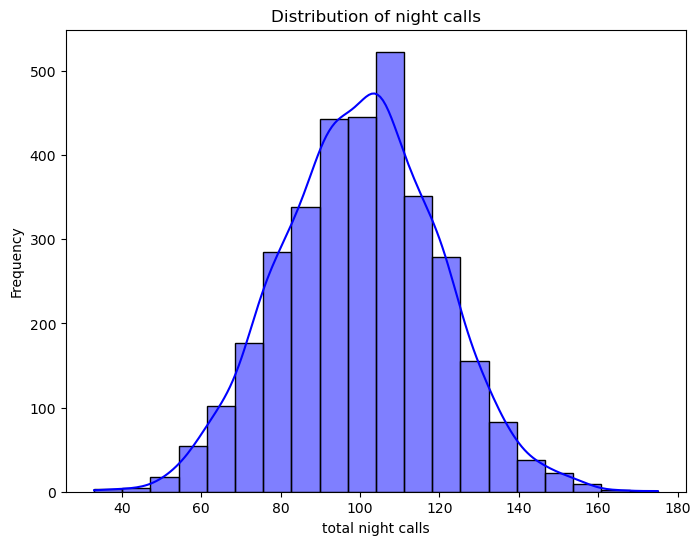

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total night calls'], bins=20, kde=True, color= 'blue')
plt.title('Distribution of night calls')
plt.xlabel('total night calls')
plt.ylabel('Frequency')
plt.show()

c:\Users\Admin\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


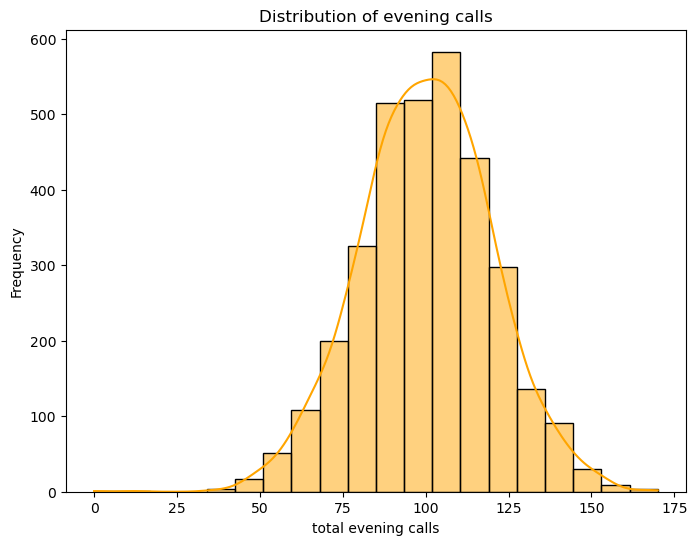

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total eve calls'], bins=20, kde=True, color= 'orange')
plt.title('Distribution of evening calls')
plt.xlabel('total evening calls')
plt.ylabel('Frequency')
plt.show()

c:\Users\Admin\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


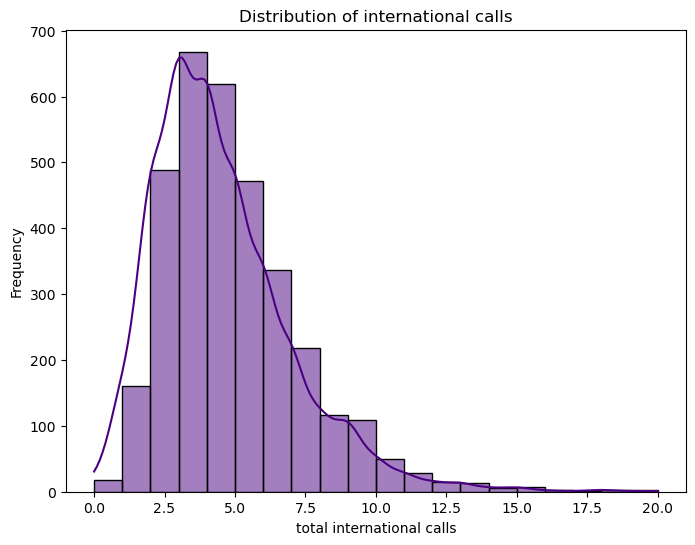

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total intl calls'], bins=20, kde=True, color= 'indigo')
plt.title('Distribution of international calls')
plt.xlabel('total international calls')
plt.ylabel('Frequency')
plt.show()

### Bivariate analysis
Exploring the relationship between two variables in the dataset

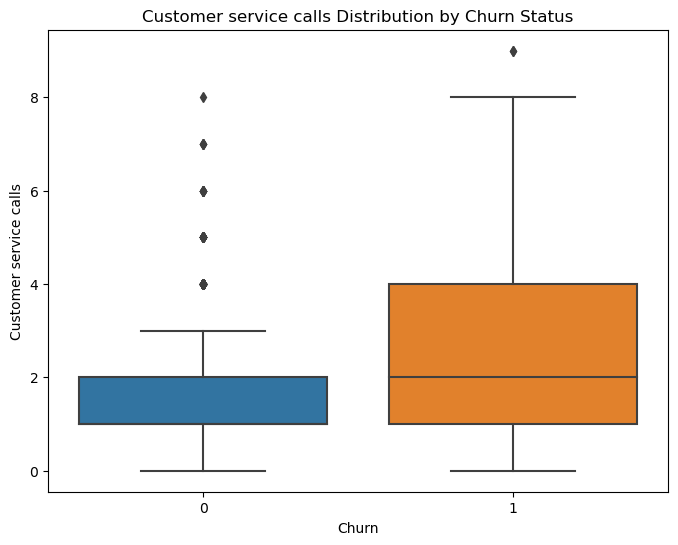

In [18]:
# Exploring the relationship between customer service calls and churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer service calls Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Customer service calls')
plt.show()

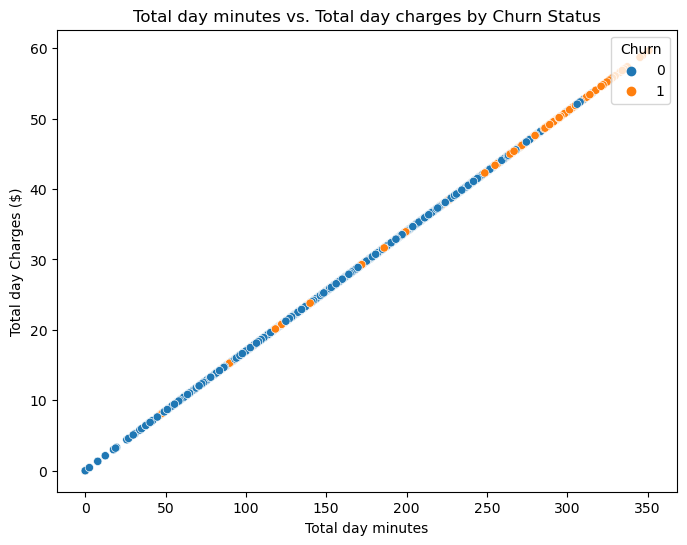

In [19]:
# Exploring the relationship between total day minutes and total day charge 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total day minutes', y='total day charge', hue='churn', data=df)
plt.title('Total day minutes vs. Total day charges by Churn Status')
plt.xlabel('Total day minutes')
plt.ylabel('Total day Charges ($)')
plt.legend(title='Churn', loc='upper right')
plt.show()

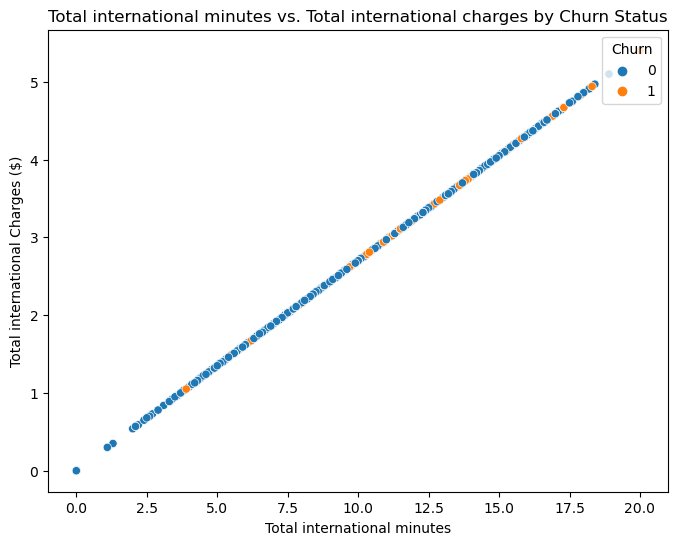

In [20]:
# Exploring the relationship between total international minutes and total international charge 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total intl minutes', y='total intl charge', hue='churn', data=df)
plt.title('Total international minutes vs. Total international charges by Churn Status')
plt.xlabel('Total international minutes')
plt.ylabel('Total international Charges ($)')
plt.legend(title='Churn', loc='upper right')
plt.show()

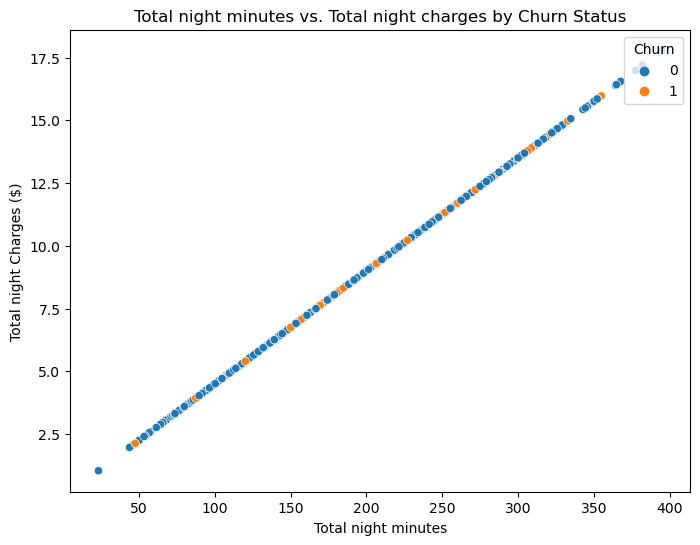

In [21]:
# Exploring the relationship between total nigt minutes and total night charge 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total night minutes', y='total night charge', hue='churn', data=df)
plt.title('Total night minutes vs. Total night charges by Churn Status')
plt.xlabel('Total night minutes')
plt.ylabel('Total night Charges ($)')
plt.legend(title='Churn', loc='upper right')
plt.show()

## Feature Engineering

In [22]:

# Dropping non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

#Correlation with the target variable
cor = numeric_df.corr()
cor_target = abs(cor["churn"])
cor_target 

account length            0.016541
area code                 0.006174
number vmail messages     0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls          0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
voice mail plan           0.102148
international plan        0.259852
Name: churn, dtype: float64

Customer service calls seems to have the highest correlation with our target (Churn) variable out of all the other variables.

In [23]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

number vmail messages     0.089728
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total night minutes       0.035493
total night charge        0.035496
total intl minutes        0.068239
total intl calls          0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
voice mail plan           0.102148
international plan        0.259852
Name: churn, dtype: float64

In [24]:
#low correlated features
relevant_features = cor_target[cor_target<0.03]
relevant_features

account length       0.016541
area code            0.006174
total day calls      0.018459
total eve calls      0.009233
total night calls    0.006141
Name: churn, dtype: float64

In [25]:
# Dropping low correlated and unnecessary columns from the data set
df.drop(['account length', 'area code', 'total day calls', 'total eve calls', 'total night calls', 'phone number'], axis=1, inplace=True)

In [26]:
df.head()

,state,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,voice mail plan,international plan
0,KS,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,0,1,0
1,OH,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,0,1,0
2,NJ,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,0,0,0
3,OH,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,0,0,1
4,OK,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,0,0,1


In [27]:
df.shape

(3333, 15)

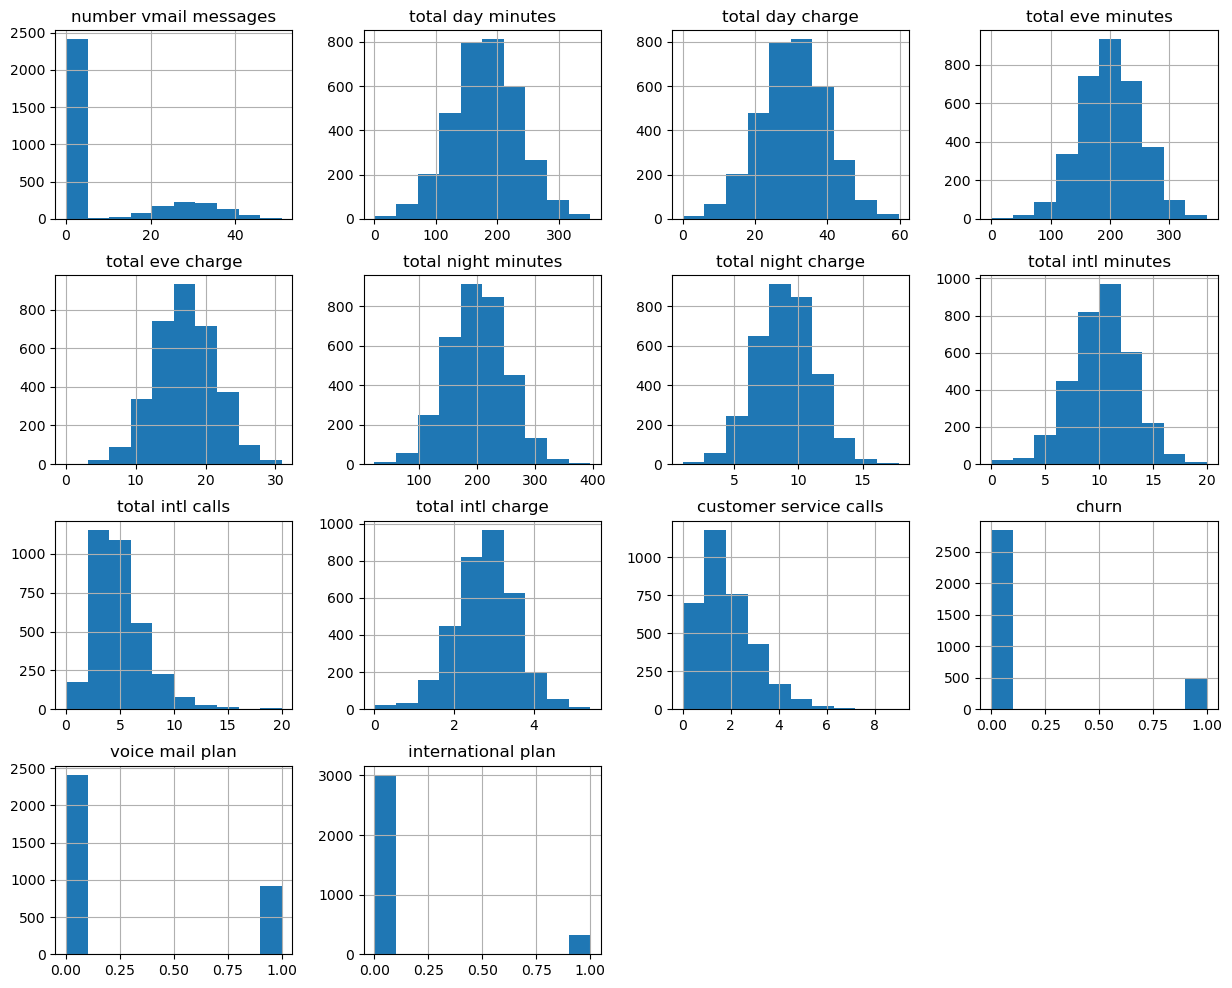

In [28]:
df.hist(figsize=(15,12))
plt.show()